In [61]:
import pandas as pd #1
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv("/home/tylefnx/Documents/data.csv") #2

In [63]:
data.head() #3


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
data.info() #4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [65]:
data.drop(["Unnamed: 32", "id"], axis = 1, inplace=True) #6

In [66]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

M.info()
B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  212 no

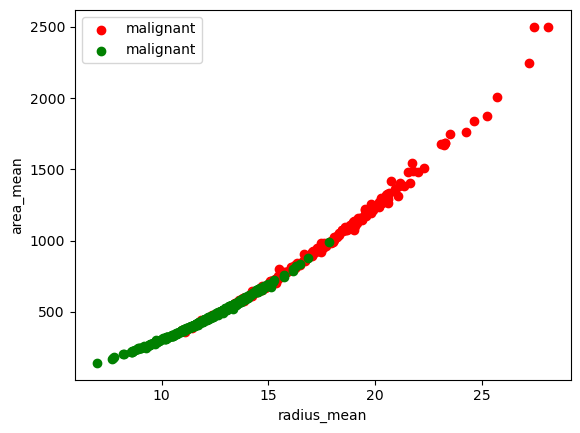

In [67]:
plt.scatter(M.radius_mean, M.area_mean, color="red", label="malignant")
plt.scatter(B.radius_mean, B.area_mean, color="green", label="malignant")

plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.show()

In [68]:
data.diagnosis=(1 if each=="M" else 0 for each in data.diagnosis)

data.diagnosis

y = data.diagnosis.values

x_data = data.iloc[:,1:3].values

x =(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_head=knn.predict(x_test)
y_head

print("when k is {}, accuracy of KNN Clasification".format(3,knn.score(x_test,y_test)))

/tmp/ipykernel_20459/756281409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.diagnosis=(1 if each=="M" else 0 for each in data.diagnosis)


AttributeError: 'generator' object has no attribute 'values'

In [ ]:
import pandas as pd #1
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

iris = load_iris()

x_train, x_test, y_train, y_test= train_test_split(iris.data, iris.target, text_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


labels = ("Setosa", "Versicolor", "Virginica")
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

#plt.figure()

